In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_medals = pd.read_csv('data/full_medal_data.csv')
full_medals = full_medals.sort_values(by=['Country Code', 'Year']).reset_index(drop=True)
full_medals

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,Host Continent,Team Size,Participated Events,Total Events
0,0,Afghanistan,0,0,0,0,1936,AFG,0,0,0,16.0,4,129.0
1,0,Afghanistan,0,0,0,0,1948,AFG,0,0,0,25.0,2,136.0
2,0,Afghanistan,0,0,0,0,1956,AFG,0,0,0,12.0,1,151.0
3,0,Afghanistan,0,0,0,0,1960,AFG,0,0,0,16.0,13,150.0
4,0,Afghanistan,0,0,0,0,1964,AFG,0,0,1,8.0,8,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,38,Zimbabwe,1,3,0,4,2008,ZIM,0,0,0,16.0,15,302.0
3198,0,Zimbabwe,0,0,0,0,2012,ZIM,0,0,0,9.0,8,302.0
3199,0,Zimbabwe,0,0,0,0,2016,ZIM,0,0,0,31.0,13,306.0
3200,0,Zimbabwe,0,0,0,0,2020,ZIM,0,0,0,5.0,5,339.0


In [3]:
full_medals.loc[:, 'Possible Gold'] = full_medals.groupby('Year')['Gold'].transform('sum')
full_medals.loc[:, 'Possible Silver'] = full_medals.groupby('Year')['Silver'].transform('sum')
full_medals.loc[:, 'Possible Bronze'] = full_medals.groupby('Year')['Bronze'].transform('sum')
full_medals

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,Host Continent,Team Size,Participated Events,Total Events,Possible Gold,Possible Silver,Possible Bronze
0,0,Afghanistan,0,0,0,0,1936,AFG,0,0,0,16.0,4,129.0,141,140,141
1,0,Afghanistan,0,0,0,0,1948,AFG,0,0,0,25.0,2,136.0,138,135,138
2,0,Afghanistan,0,0,0,0,1956,AFG,0,0,0,12.0,1,151.0,153,153,163
3,0,Afghanistan,0,0,0,0,1960,AFG,0,0,0,16.0,13,150.0,152,149,160
4,0,Afghanistan,0,0,0,0,1964,AFG,0,0,1,8.0,8,163.0,163,167,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,38,Zimbabwe,1,3,0,4,2008,ZIM,0,0,0,16.0,15,302.0,302,303,353
3198,0,Zimbabwe,0,0,0,0,2012,ZIM,0,0,0,9.0,8,302.0,303,305,352
3199,0,Zimbabwe,0,0,0,0,2016,ZIM,0,0,0,31.0,13,306.0,306,307,359
3200,0,Zimbabwe,0,0,0,0,2020,ZIM,0,0,0,5.0,5,339.0,340,338,402


In [4]:
def country_medals(country):
    medals = full_medals.where(full_medals['Country Code'] == country).dropna().sort_values(by="Year")
    return medals

rows = []
countries = full_medals['Country Code'].unique()

n = 2

for i in range(1, n+1):
    full_medals.loc[:, f'Gold - {i}'] = full_medals.groupby('Country Code')['Gold'].shift(periods=i)
    full_medals.loc[:, f'Silver - {i}'] = full_medals.groupby('Country Code')['Silver'].shift(periods=i)
    full_medals.loc[:, f'Bronze - {i}'] = full_medals.groupby('Country Code')['Bronze'].shift(periods=i)

    full_medals.loc[:, f'Team Size - {i}'] = full_medals.groupby('Country Code')['Team Size'].shift(periods=1)    

# full_medals.loc[:, f'Team Size - 1'] = full_medals.groupby('Country Code')['Team Size'].shift(periods=1)

full_medals = full_medals.fillna(0)
full_medals

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,...,Possible Silver,Possible Bronze,Gold - 1,Silver - 1,Bronze - 1,Team Size - 1,Gold - 2,Silver - 2,Bronze - 2,Team Size - 2
0,0,Afghanistan,0,0,0,0,1936,AFG,0,0,...,140,141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Afghanistan,0,0,0,0,1948,AFG,0,0,...,135,138,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
2,0,Afghanistan,0,0,0,0,1956,AFG,0,0,...,153,163,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
3,0,Afghanistan,0,0,0,0,1960,AFG,0,0,...,149,160,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
4,0,Afghanistan,0,0,0,0,1964,AFG,0,0,...,167,174,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,38,Zimbabwe,1,3,0,4,2008,ZIM,0,0,...,303,353,1.0,1.0,1.0,14.0,0.0,0.0,0.0,14.0
3198,0,Zimbabwe,0,0,0,0,2012,ZIM,0,0,...,305,352,1.0,3.0,0.0,16.0,1.0,1.0,1.0,16.0
3199,0,Zimbabwe,0,0,0,0,2016,ZIM,0,0,...,307,359,0.0,0.0,0.0,9.0,1.0,3.0,0.0,9.0
3200,0,Zimbabwe,0,0,0,0,2020,ZIM,0,0,...,338,402,0.0,0.0,0.0,31.0,0.0,0.0,0.0,31.0


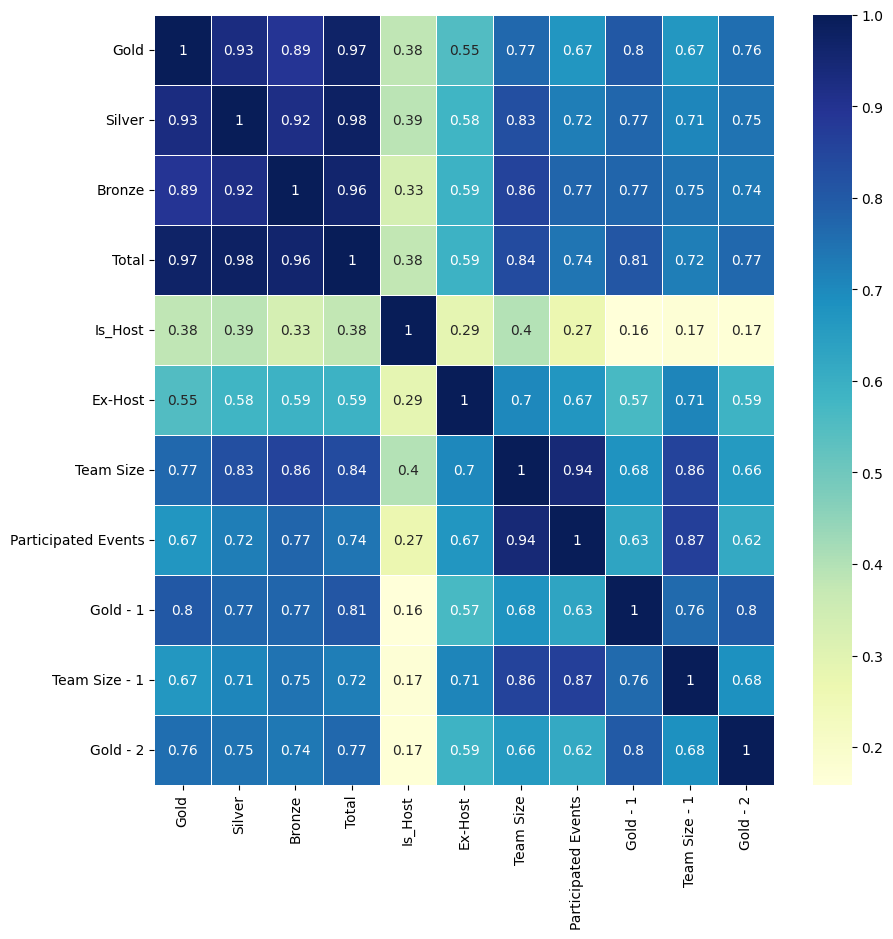

In [17]:
import seaborn as sns

important_corr = full_medals.loc[:,['Gold','Silver','Bronze','Total','Is_Host','Ex-Host','Team Size','Participated Events','Gold - 1','Team Size - 1','Gold - 2']]


fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(important_corr.corr(numeric_only=True), cmap="YlGnBu", linewidths=.5, annot=True, ax=ax)
fig.savefig('corrplot.png')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = full_medals[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', 'Team Size - 1', 'Team Size - 2', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]

train = data[data['Year'] <= 2012]
test = data[data['Year'] > 2012]

X_train = train.iloc[:, :-7]
y_train = train.iloc[:, -7:]
X_test = test.iloc[:, :-7]
y_test = test.iloc[:, -7:]


truth_counts_train = y_train.iloc[:, :]
y_train = y_train.iloc[:, 4:]
truth_counts_test = y_test.iloc[:, :]
y_test = y_test.iloc[:, 4:]

In [ ]:
def fit(estimator, classifier, X, y):
    classifier.fit(X, y.any(axis=1))
    estimator.fit(X, y)

def predict(estimator, classifier, X):
    y = np.zeros(shape=(X.shape[0], 3))

    nonzero_indices = classifier.predict(X)
    y[nonzero_indices] = estimator.predict(X[nonzero_indices])

    return y

In [ ]:
def scale_predictions(predictions, possible_counts):
    predictions = pd.DataFrame(predictions, columns=[['Gold', 'Silver', 'Bronze']])
    possible_counts = possible_counts.reset_index(drop=True)

    possible_counts[['Predicted Gold', 'Predicted Silver', 'Predicted Bronze']] = predictions[['Gold', 'Silver', 'Bronze']]

    possible_counts['Corrected Gold'] = ((possible_counts['Predicted Gold'] / possible_counts.groupby('Year')['Predicted Gold'].transform('sum')) * possible_counts['Possible Gold']).astype(int)
    possible_counts['Corrected Silver'] = ((possible_counts['Predicted Silver'] / possible_counts.groupby('Year')['Predicted Silver'].transform('sum')) * possible_counts['Possible Silver']).astype(int)
    possible_counts['Corrected Bronze'] = ((possible_counts['Predicted Bronze'] / possible_counts.groupby('Year')['Predicted Bronze'].transform('sum')) * possible_counts['Possible Bronze']).astype(int)

    return possible_counts[['Gold', 'Silver', 'Bronze', 'Corrected Gold', 'Corrected Silver', 'Corrected Bronze']]

y_pred = predict(reg, cls, X_test)
predictions = scale_predictions(y_pred, truth_counts_test)
predictions

In [ ]:
plt.scatter(predictions['Silver'], predictions['Corrected Silver'])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Gold:", mean_absolute_error(predictions['Gold'], predictions['Corrected Gold']))
print("Silver:", mean_absolute_error(predictions['Silver'], predictions['Corrected Silver']))
print("Bronze:", mean_absolute_error(predictions['Bronze'], predictions['Corrected Bronze']))

In [ ]:
from sklearn.svm import SVC

# cls = SVC().fit(X_train, ~y_train.any(axis=1).to_numpy())
reg = MultiOutputRegressor(Lasso(alpha=0.1, random_state=0)).fit(X_train[y_train.any(axis=1)], y_train[y_train.any(axis=1)])
# print(cls.score(X_train, ~y_train.any(axis=1).to_numpy()))
print(reg.score(X_train[y_train.any(axis=1)], y_train[y_train.any(axis=1)].to_numpy()))

In [ ]:
y_pred = reg.predict(X_test[y_test.any(axis=1)])

print("Test:", root_mean_squared_error(y_test[y_test.any(axis=1)].to_numpy(), y_pred))

plt.scatter(y_test[y_test.any(axis=1)].to_numpy()[:, 1], y_pred[:, 1])

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(3)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 4])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)



In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=50)

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)
display(test_results)
pd.DataFrame(test_results, index=['Mean absolute error']).T

In [ ]:
print("Train:", root_mean_squared_error(y_train, dnn_model.predict(X_train)))
print("Test:", root_mean_squared_error(y_test, dnn_model.predict(X_test)))

In [ ]:
y_pred = dnn_model.predict(X_test)
plt.scatter(y_test.to_numpy()[:, 0], y_pred[:, 0])

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV, Perceptron, Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVC

years = list(full_medals['Year'].unique())
n_folds = 7

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

folds = list(split(years, n_folds))
model_errors = {
    'RandomForestRegressor': 0,
    'ElasticNet': 0,
    'ElasticNetCV': 0,
    'GradientBoostingRegressor': 0,
    'LinearRegression': 0,
    'Ridge': 0,
    'Lasso': 0
}
for fold in folds:
    print(f'Running fold {fold}')
    data = full_medals[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', 'Team Size - 1', 'Team Size - 2', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]
    train = data[~data['Year'].isin(fold)]
    test = data[data['Year'].isin(fold)]

    X_train = train.iloc[:, :-7]
    y_train = train.iloc[:, -7:]
    X_test = test.iloc[:, :-7]
    y_test = test.iloc[:, -7:]
    
    
    truth_counts_train = y_train.iloc[:, :]
    y_train = y_train.iloc[:, 4:]
    truth_counts_test = y_test.iloc[:, :]
    y_test = y_test.iloc[:, 4:]

    reg = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['LinearRegression'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, max_depth=30, random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['RandomForestRegressor'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(ElasticNet(random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['ElasticNet'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(ElasticNetCV(random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['ElasticNetCV'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['GradientBoostingRegressor'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(Ridge(random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['Ridge'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

    reg = MultiOutputRegressor(Lasso(random_state=0)).fit(X_train, y_train)
    cls = SVC()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['Lasso'] += mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze'])

for key in model_errors:
    model_errors[key] /= n_folds

display(model_errors)